# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
import pandas
import numpy
data = pandas.read_csv('preprocessed_data.csv')
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [2]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(73196, 8) (73196,)
(36052, 8) (36052,)


<h2>1.3 Make Data Model Ready: encoding eassay</h2>

### 1.3.1 Bag Of Words represntation

In [5]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)
bow_essay_feature_names= vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)

After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


### 1.3.2 TF-IDF Representation

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['essay'].values)

X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)
tfidf_essay_feature_names= vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_train.shape)

After vectorizations
(73196, 14188) (73196,)
(36052, 14188) (73196,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

<h3>1.4.1 encoding categorical features: School State</h3>

In [7]:
vectorizer = CountVectorizer(binary=True)

vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)
ohe_state_feature_names= vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(ohe_state_feature_names)
print("="*100)

After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


<h3>1.4.2 encoding categorical features: teacher_prefix</h3>

In [8]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)
ohe_teacher_prefix_feature_names= vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(ohe_teacher_prefix_feature_names)
print("="*100)

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


<h3>1.4.3 encoding categorical features: project_grade_category</h3>

In [9]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

ohe_project_grade_category_feature_names= vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(ohe_project_grade_category_feature_names)
print("="*100)

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


<h3>1.4.4 encoding categorical features: clean_categories</h3>

In [10]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)

ohe_clean_categories_feature_names= vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_clean_cat_ohe.shape, y_train.shape)
print(X_test_clean_cat_ohe.shape, y_test.shape)
print(ohe_clean_categories_feature_names)
print("="*100)

After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


<h3>1.4.5 encoding categorical features: clean_subcategories</h3>

In [11]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcat_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_clean_subcat_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

ohe_clean_subcategories_feature_names= vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_clean_subcat_ohe.shape, y_train.shape)
print(X_test_clean_subcat_ohe.shape, y_test.shape)
print(ohe_clean_subcategories_feature_names)
print("="*100)

After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


<h3>1.5.1 encoding numerical features: Price</h3>

In [13]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1)).reshape(-1,1)
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1)).reshape(-1,1)


print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


<h3>1.5.2 encoding numerical features: teacher_number_of_previously_posted_projects</h3>

In [14]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_previous_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)
X_test_previous_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)



print("After vectorizations")
print(X_train_previous_projects_norm.shape, y_train.shape)
print(X_test_previous_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


# Classification of Set-1 dataset

### 2.1.1 Concatinating all the features for Bag of Words representation

In [15]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_cat_ohe, 
               X_train_clean_subcat_ohe, X_train_price_norm, X_train_previous_projects_norm)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_clean_cat_ohe,
               X_test_clean_subcat_ohe, X_test_price_norm, X_test_previous_projects_norm)).tocsr()

lst=[]
lst.extend(bow_essay_feature_names)
lst.extend(ohe_state_feature_names)
lst.extend(ohe_teacher_prefix_feature_names)
lst.extend(ohe_project_grade_category_feature_names)
lst.extend(ohe_clean_categories_feature_names)
lst.extend(ohe_clean_subcategories_feature_names)
lst.extend("Price")
lst.extend("teacher_number_of_previously_posted_projects")


print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 5101) (73196,)
(36052, 5101) (36052,)


<h3>2.1.2 Appling NB on Set-1 and performing RandomSearchCV</h3>

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html 
# Since we have imbalance dataset, we use class prior =[0.5,0.5]
multi_NB = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearch 
clf = RandomizedSearchCV(multi_NB, parameters, cv=5, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr, y_train)

results = pandas.DataFrame.from_dict(clf.cv_results_)


In [17]:
print(results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.184666      0.020966         0.029252        0.007008       1e-05   
1       0.195503      0.018785         0.031317        0.002491      0.0001   
2       0.200304      0.007432         0.029485        0.004256       0.001   
3       0.199872      0.005548         0.028972        0.006713        0.01   
4       0.195093      0.007038         0.033650        0.002934         0.1   
5       0.195977      0.005910         0.031500        0.000484           1   
6       0.198142      0.007132         0.032543        0.002103          10   
7       0.197373      0.008484         0.032418        0.007760         100   
8       0.198806      0.005159         0.025003        0.007635        1000   
9       0.205197      0.013876         0.023775        0.006702       10000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-05}           0.698363          

### 2.1.3 Finding best Hyper Parameter

In [18]:
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha = results['param_alpha']

In [19]:
import math
log_alpha=[math.log(i) for i in alpha]
print(log_alpha)

[-11.512925464970229, -9.210340371976182, -6.907755278982137, -4.605170185988091, -2.3025850929940455, 0.0, 2.302585092994046, 4.605170185988092, 6.907755278982137, 9.210340371976184]


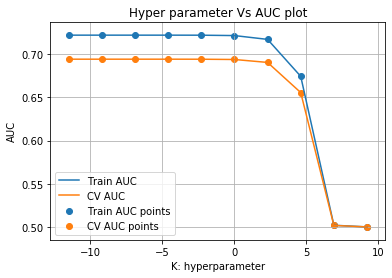

In [20]:
plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')
plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

### 2.1.4 Plotting ROC curve for the given Alpha

In [21]:
index=numpy.argmax(cv_auc)
best_alpha_bow=alpha[index]
print(best_alpha_bow)

0.0001


C:\Users\rubiy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


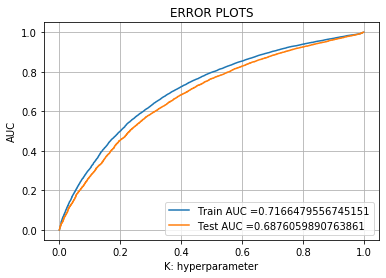

In [22]:
from sklearn.metrics import roc_curve, auc

#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html 
# Since we have imbalance dataset, we use class prior =[0.5,0.5]
clasify = MultinomialNB(alpha=best_alpha_bow,class_prior=[0.5,0.5])
clasify.fit(X_tr, y_train)
y_train_pred=clasify.predict_log_proba(X_tr)[:,1]
y_test_pred=clasify.predict_log_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

bow_train_auc=auc(train_fpr, train_tpr)
bow_test_auc=auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(bow_train_auc))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(bow_test_auc))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### 2.1.5 Finding Best Threshold and Predicting Class Labels

In [23]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[numpy.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", numpy.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [24]:
print("="*100)
from sklearn.metrics import confusion_matrix

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

y_train_predict=predict_with_best_t(y_train_pred, best_t)
y_test_predict=predict_with_best_t(y_test_pred, best_t)


the maximum value of tpr*(1-fpr) 0.4430143087248612 for threshold -0.853


### 2.1.6 Computing Confusion Matrix for both Train and Test dataset

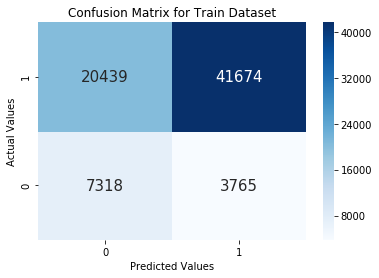

In [25]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
import seaborn as sn

df=confusion_matrix(y_train, y_train_predict)
sn.heatmap(df, annot=True,fmt="g",cmap="Blues", annot_kws={"size": 15})
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.xlim(0,2)
plt.ylim(0,2)
plt.title("Confusion Matrix for Train Dataset") 
plt.show()

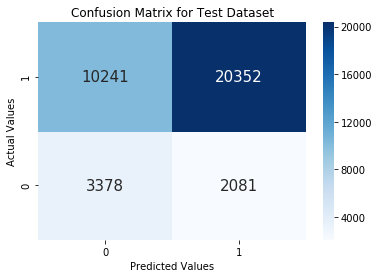

In [26]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
import seaborn as sn

df_1=confusion_matrix(y_test, y_test_predict)
sn.heatmap(df_1, annot=True,fmt="g",cmap="Blues", annot_kws={"size": 15})
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.xlim(0,2)
plt.ylim(0,2)
plt.title("Confusion Matrix for Test Dataset") 
plt.show()

### 2.1.7 Train and Test Accuracy Scores

In [27]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score

print("The train accuracy is :"+str(accuracy_score(y_train, y_train_predict)))
print("The test accuracy is :"+str(accuracy_score(y_test, y_test_predict)))

The train accuracy is :0.669326192688125
The test accuracy is :0.6582159103517142


### 2.1.8 Top 20 features of Negative Class and Positive Class

In [28]:
indices=numpy.argsort(clasify.feature_log_prob_[0])[:-21:-1]
print(indices)

[3993 3580 2305 2768  678 2931 2247 4463 1869 2788 4403 2837 2573 4781
 2851 4882  769 2468 3404   89]


In [29]:
bow_top_20_features_negative_class=[lst[i] for i in indices]
print("These are the top 20 features of negative class :")
print(bow_top_20_features_negative_class)

These are the top 20 features of negative class :
['students', 'school', 'learning', 'my', 'classroom', 'not', 'learn', 'they', 'help', 'my students', 'the', 'nannan', 'many', 'we', 'need', 'work', 'come', 'love', 'reading', 'able']


In [30]:
indices=numpy.argsort(clasify.feature_log_prob_[1])[:-21:-1]
print(indices)

[3993 3580 2768 2305  678 4403 4463 2931 2788 2247 1869 2573 2837 4781
 4882 2851 3404 4665 2468  999]


In [31]:
bow_top_20_features_positive_class=[lst[i] for i in indices]
print("These are the top 20 features of positive class :")
print(bow_top_20_features_positive_class)

These are the top 20 features of positive class :
['students', 'school', 'my', 'learning', 'classroom', 'the', 'they', 'not', 'my students', 'learn', 'help', 'many', 'nannan', 'we', 'work', 'need', 'reading', 'use', 'love', 'day']


# Classification of Set-2 dataset

### 2.2.1 Concatinating all the features for TF-IDF representation

In [32]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_cat_ohe, 
               X_train_clean_subcat_ohe, X_train_price_norm, X_train_previous_projects_norm)).tocsr()
X_te = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_clean_cat_ohe,
               X_test_clean_subcat_ohe, X_test_price_norm, X_test_previous_projects_norm)).tocsr()


lst=[]
lst.extend(tfidf_essay_feature_names)
lst.extend(ohe_state_feature_names)
lst.extend(ohe_teacher_prefix_feature_names)
lst.extend(ohe_project_grade_category_feature_names)
lst.extend(ohe_clean_categories_feature_names)
lst.extend(ohe_clean_subcategories_feature_names)
lst.extend("Price")
lst.extend("teacher_number_of_previously_posted_projects")


print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 14350) (73196,)
(36052, 14350) (36052,)


<h3>2.2.2 Appling NB on Set-2 and performing RandomizedSearchCV</h3>

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html 
# Since we have imbalance dataset, we use class prior =[0.5,0.5]
multi_NB = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearch 
clf = RandomizedSearchCV(multi_NB, parameters, cv=5, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr, y_train)

results = pandas.DataFrame.from_dict(clf.cv_results_)

In [34]:
print(results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.114616      0.005504         0.021240        0.002798       1e-05   
1       0.164950      0.011741         0.031554        0.003997      0.0001   
2       0.157075      0.018151         0.031536        0.005506       0.001   
3       0.169533      0.020798         0.025675        0.006286        0.01   
4       0.168118      0.007455         0.027980        0.007836         0.1   
5       0.166012      0.007564         0.027101        0.005730           1   
6       0.159595      0.007838         0.031109        0.008655          10   
7       0.168444      0.004533         0.029133        0.003408         100   
8       0.164418      0.007626         0.029962        0.007654        1000   
9       0.157702      0.004645         0.031603        0.000716       10000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-05}           0.666761          

### 2.2.3 Finding best Hyper Parameter

In [35]:
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha = results['param_alpha']

In [36]:
import math
log_alpha=[math.log(i) for i in alpha]
print(log_alpha)

[-11.512925464970229, -9.210340371976182, -6.907755278982137, -4.605170185988091, -2.3025850929940455, 0.0, 2.302585092994046, 4.605170185988092, 6.907755278982137, 9.210340371976184]


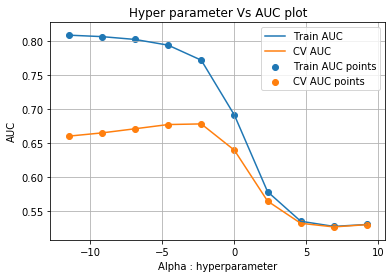

In [37]:
plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')
plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

### 2.2.4 Plotting ROC curve for the given Alpha

In [38]:
index=numpy.argmax(cv_auc)
best_alpha_tfidf=alpha[index]
print(best_alpha_tfidf)

0.1


C:\Users\rubiy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


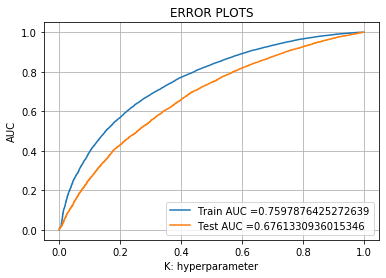

In [39]:
from sklearn.metrics import roc_curve, auc

#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html 
# Since we have imbalance dataset, we use class prior =[0.5,0.5]
clasify = MultinomialNB(alpha=best_alpha_tfidf,class_prior=[0.5,0.5])
clasify.fit(X_tr, y_train)
y_train_pred=clasify.predict_log_proba(X_tr)[:,1]
y_test_pred=clasify.predict_log_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

tfidf_train_auc=auc(train_fpr, train_tpr)
tfidf_test_auc=auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(tfidf_train_auc))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(tfidf_test_auc))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### 2.2.5 Finding Best Threshold and Predicting Class Labels

In [40]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[numpy.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", numpy.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [41]:
print("="*100)
from sklearn.metrics import confusion_matrix

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

y_train_predict=predict_with_best_t(y_train_pred, best_t)
y_test_predict=predict_with_best_t(y_test_pred, best_t)

the maximum value of tpr*(1-fpr) 0.4801786379569613 for threshold -0.67


### 2.2.6 Computing Confusion Matrix for both Train and Test dataset

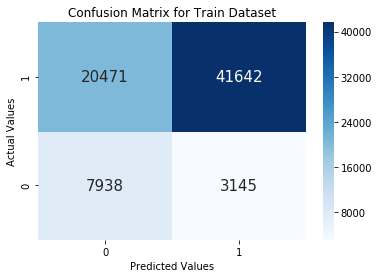

In [42]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
import seaborn as sn

df=confusion_matrix(y_train, y_train_predict)
sn.heatmap(df, annot=True,fmt="g",cmap="Blues", annot_kws={"size": 15})
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.xlim(0,2)
plt.ylim(0,2)
plt.title("Confusion Matrix for Train Dataset") 
plt.show()

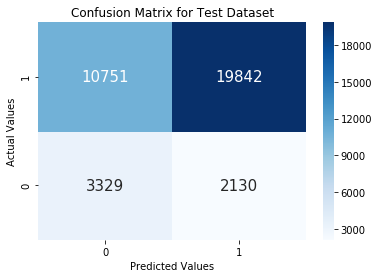

In [43]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
import seaborn as sn

df_1=confusion_matrix(y_test, y_test_predict)
sn.heatmap(df_1, annot=True,fmt="g",cmap="Blues", annot_kws={"size": 15})
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.xlim(0,2)
plt.ylim(0,2)
plt.title("Confusion Matrix for Test Dataset") 
plt.show()

### 2.2.7 Train and Test Accuracy Scores

In [44]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score

print("The train accuracy is :"+str(accuracy_score(y_train, y_train_predict)))
print("The test accuracy is :"+str(accuracy_score(y_test, y_test_predict)))

The train accuracy is :0.6773594185474616
The test accuracy is :0.6427105292355486


### 2.2.8 Top 20 features of Negative Class and Positive Class

In [45]:
indices=numpy.argsort(clasify.feature_log_prob_[0])[:-21:-1]
print(indices)

[14302 14313 14308 14314 14303 14305 14335 14337 14336 14306 14316 14344
 14311 14253 12280 14309 14318 14307 14301 14315]


In [46]:
tfidf_top_20_features_negative_class=[lst[i] for i in indices]
print("These are the top 20 features of negative class :")
print(bow_top_20_features_negative_class)

These are the top 20 features of negative class :
['students', 'school', 'learning', 'my', 'classroom', 'not', 'learn', 'they', 'help', 'my students', 'the', 'nannan', 'many', 'we', 'need', 'work', 'come', 'love', 'reading', 'able']


In [47]:
indices=numpy.argsort(clasify.feature_log_prob_[1])[:-21:-1]
print(indices)

[14302 14313 14308 14314 14303 14305 14335 14337 14336 14306 14253 12280
 14311 14344 14316 14309 14307 14301 14318 14333]


In [48]:
tfidf_top_20_features_positive_class=[lst[i] for i in indices]
print("These are the top 20 features of positive class :")
print(bow_top_20_features_positive_class)

These are the top 20 features of positive class :
['students', 'school', 'my', 'learning', 'classroom', 'the', 'they', 'not', 'my students', 'learn', 'help', 'many', 'nannan', 'we', 'work', 'need', 'reading', 'use', 'love', 'day']


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

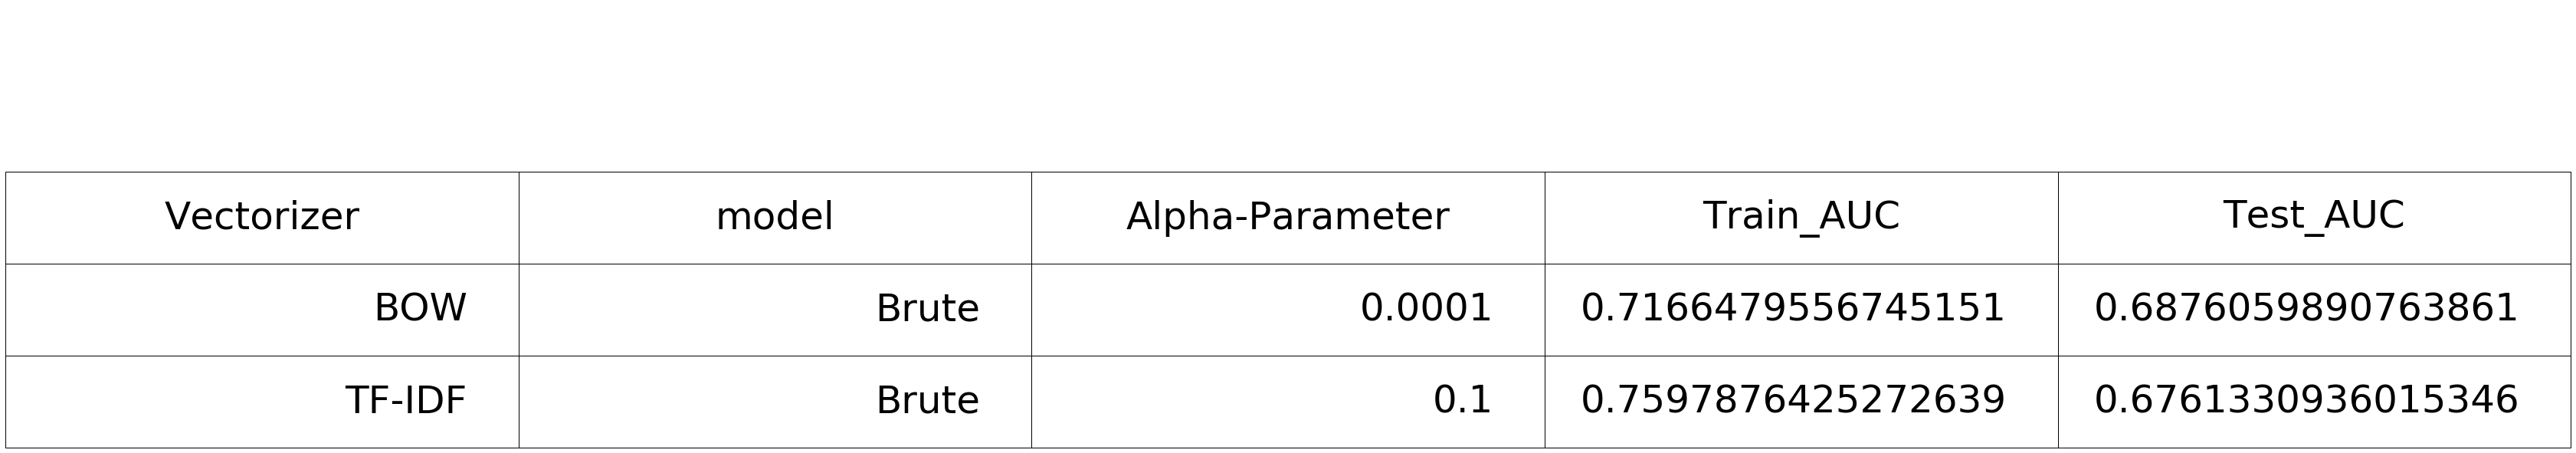

In [49]:
# https://chadrick-kwag.net/matplotlib-table-example/
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.table.html

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data=[["BOW","Brute",best_alpha_bow, bow_train_auc, bow_test_auc],
      ["TF-IDF","Brute",best_alpha_tfidf, tfidf_train_auc, tfidf_test_auc]]
table=ax.table(cellText=data,colLabels=["Vectorizer","model","Alpha-Parameter","Train_AUC","Test_AUC"])
table.set_fontsize(50)
table.scale(10,10)
ax.axis("off")
plt.show()